# House price prediction- Nottingham
Goal: Predict the guide price of houses listed on rightmove in nottingham

Objective: Use a Linear regression model to help predict

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Understanding the data

1.1 Understand the statistice of the data

2. Preprocess the data 
- Create a pipeline to fit numerous transformers

3. Fit a model

3.1 Grid search for the best params

3.2 Train model with new parameters and get MAE

3.3 Publish results

### 1. Understanding the data

In [2]:
df = pd.read_csv('rightmove_data')
df.head()

,address,house_type,bedrooms,bathrooms,guide_price
0,"Upper Parliament Street, Nottingham, NG1 2AP",Flat,1.0,1.0,75000.0
1,STUDENT PROPERTY NOTTINGHAM CITY CENTER,House Share,5.0,5.0,4950000.0
2,"Fairmont, Edwalton",Detached,5.0,5.0,3700000.0
3,"Fairmont, Edwalton",Detached,5.0,5.0,3700000.0
4,"North Sherwood street, Nottingham",House Share,4.0,4.0,3600000.0


In [3]:
df

,address,house_type,bedrooms,bathrooms,guide_price
0,"Upper Parliament Street, Nottingham, NG1 2AP",Flat,1.0,1.0,75000.0
1,STUDENT PROPERTY NOTTINGHAM CITY CENTER,House Share,5.0,5.0,4950000.0
2,"Fairmont, Edwalton",Detached,5.0,5.0,3700000.0
3,"Fairmont, Edwalton",Detached,5.0,5.0,3700000.0
4,"North Sherwood street, Nottingham",House Share,4.0,4.0,3600000.0
...,...,...,...,...,...
1045,"Wilne Road, Sawley",Cottage,3.0,3.0,325000.0
1046,"Park Road,\r\nCalverton,\r\nNottingham,\r\nNG1...",Detached,4.0,4.0,324995.0
1047,"Hampton Close, Toton",Detached Bungalow,3.0,3.0,320000.0
1048,"(Plot 3) Block A, The Yacht Club, NG2",Apartment,2.0,2.0,320000.0


In [4]:
#where are the null values
df.isnull().sum()

# the na vals in guide price are POA values

address         0
house_type      0
bedrooms       27
bathrooms      27
guide_price     2
dtype: int64

In [5]:
df.describe()

,bedrooms,bathrooms,guide_price
count,1023.000000,1023.000000,1.048000e+03
mean,3.782014,3.782014,5.102442e+05
std,1.077428,1.077428,3.272602e+05
min,1.000000,1.000000,7.500000e+04
25%,3.000000,3.000000,3.500000e+05
50%,4.000000,4.000000,4.250000e+05
75%,4.000000,4.000000,5.500000e+05
max,9.000000,9.000000,4.950000e+06


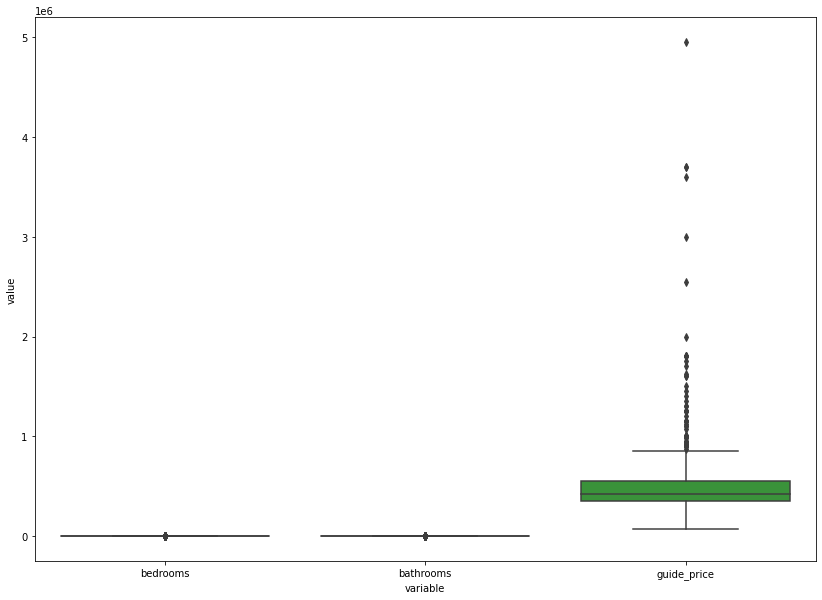

In [6]:
# Lok into skewed data

df_num = df.drop(['address','house_type'],axis = 1)

fig,ax = plt.subplots(figsize=(14,10))
ax.set_xlabel("")
ax.set_ylabel("guide_price")

melt_df = pd.melt(df_num)
melt_df.head()

ax = sns.boxplot(x='variable',y= 'value',data = melt_df)

### 2. Preprocess the data
- Null values
-Ordinal encoding

In [7]:
#seperate the label
df = df.dropna(subset='guide_price')
X,y = (df.drop(['guide_price','address'],axis =1),df['guide_price'])

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [9]:
#make a simple imputer
imp = SimpleImputer(missing_values = np.nan,strategy = 'median',add_indicator = True)

In [10]:
# Make a column transformer for the ordinal encoder

#Create OHE object
oc = OrdinalEncoder()
#get categorical columns
df_cat = [i for i in X.columns if df[i].dtype == 'O']

#Make a column transformer
column_transformer = make_column_transformer(
    (oc,df_cat),
    remainder = 'passthrough'

)

In [11]:
# Add the transformers to a pipeline

pipe = Pipeline(
[
    ('col_trans',column_transformer),
    ('imputer', imp)
    
])

In [12]:
# fit pipeline to data

transformed_data = pipe.fit_transform(X)

#create new df
transformed_df = pd.DataFrame(transformed_data )
transformed_df = transformed_df.drop([3,4],axis=1)
transformed_df = transformed_df.rename(columns ={0:'house_type',1:'bedrooms',2:'bathrooms'})

In [13]:
transformed_df

,house_type,bedrooms,bathrooms
0,10.0,1.0,1.0
1,13.0,5.0,5.0
2,7.0,5.0,5.0
3,7.0,5.0,5.0
4,13.0,4.0,4.0
...,...,...,...
1043,6.0,3.0,3.0
1044,7.0,4.0,4.0
1045,8.0,3.0,3.0
1046,0.0,2.0,2.0


### 3. Fit a Model

- Fit diferent models
- Grid search the best performing model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#impor models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

In [15]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(transformed_df,y,random_state = 40)

In [16]:
# Define model object
lr = LinearRegression()

#fit and train model
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [17]:
# Score the model
mae = mean_absolute_error(y_test,y_pred)
f'£{mae:,}' 

'£176,736.28415941139'

In [18]:
def fit_models():
    '''
    This function will fit diferent models to the training data and produce the score of each model
    
    '''
    
    
    # Initialize the models
    
    lr = LinearRegression()
    xgb = GradientBoostingRegressor()
    svr = SVR()
    models = [lr,xgb,svr]

    #loop through the models train and predict on all
    
    scores = []
    for i in models:
        i.fit(X_train,y_train)
        y_pred = i.predict(X_test)
        
        mae = mae = mean_absolute_error(y_test,y_pred)
        scores.append(f"{i}: {f'£{mae:,}'}")
    
    return scores,xgb

In [19]:
scores,xgb = fit_models()

In [20]:
scores

['LinearRegression(): £176,736.28415941139',
 'GradientBoostingRegressor(): £162,625.05155240712',
 'SVR(): £188,280.13324615156']

### 3.1
Gradient Boosting Regressor has the best mae so we will grid search for the best parameters

In [56]:
learning_rate_params = np.linspace(0.9,2,10).astype(int).tolist()
n_estimators_params = np.linspace(50,500,10).astype(int).tolist()

param_grid ={'learning_rate':[0.04,0.06,0.08,0.1,0.2,0.3,0.4,0.5,0.55],
            'n_estimators':n_estimators_params}

gs = GridSearchCV(xgb,param_grid,error_score='raise')
gs.fit(X_train,y_train)

GridSearchCV(error_score='raise', estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4,
                                           0.5, 0.55],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [46]:
gs.best_params_


{'learning_rate': 0.02, 'n_estimators': 100}

In [49]:
xgb_reg = gs.best_estimator_

### 3.2
Train and predict with the best model 

In [57]:
xgb_reg = GradientBoostingRegressor(learning_rate = 0.05,n_estimators=100)
xgb_reg.fit(X_train,y_train)
y_pred = xgb_reg.predict(X_test)
        
mae = mae = mean_absolute_error(y_test,y_pred)
f"XGB Regressor : {f'£{mae:,}'}"

'XGB Regressor : £166,294.07084187973'